In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , roc_auc_score , roc_curve , classification_report , confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import os
from copy import deepcopy
import warnings
warnings.filterwarnings ( "ignore" )

Using TensorFlow backend.


In [2]:
data = pd.read_csv("C:/Users/Adinath/Desktop/Data_Science/Assignments/Logistic Regression/bank-full.csv",sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
categorical = data.select_dtypes ( include = "object" )
print ( "Categorical columns:" )
c = 1
for i in categorical.columns:
    print ( c , "." , i )
    c += 1

Categorical columns:
1 . job
2 . marital
3 . education
4 . default
5 . housing
6 . loan
7 . contact
8 . month
9 . poutcome
10 . y


In [4]:
numerical = data.select_dtypes ( exclude = "object" )
print ( "Numerical columns:" )
c = 1
for i in numerical.columns:
    print ( c , "." , i )
    c += 1

Numerical columns:
1 . age
2 . balance
3 . day
4 . duration
5 . campaign
6 . pdays
7 . previous


In [5]:
#Dimension of the Data
print ( "Number of Rows:" , data.shape [ 0 ] )
print ( "Number of Columns:" , data.shape [ 1 ] )

Number of Rows: 45211
Number of Columns: 17


In [6]:
data.info ( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
numerical.describe ( )

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
categorical.describe ( )

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [9]:
#Checking the null values
data.isnull ( ).sum ( )

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Exploratory Data Analysis

Column: job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


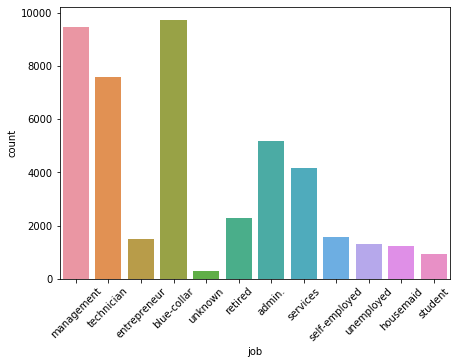



Column: marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


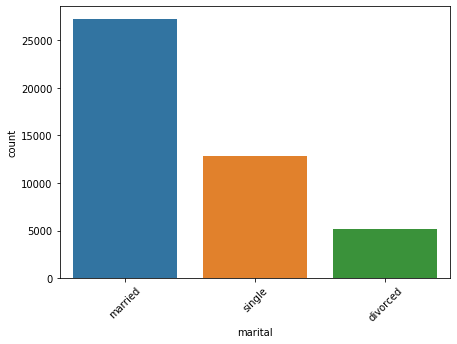



Column: education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


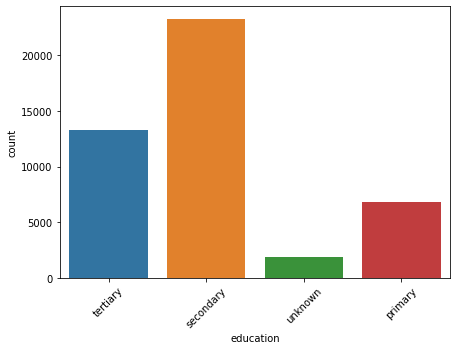



Column: default
no     44396
yes      815
Name: default, dtype: int64


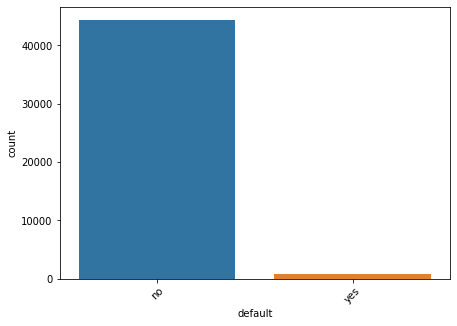



Column: housing
yes    25130
no     20081
Name: housing, dtype: int64


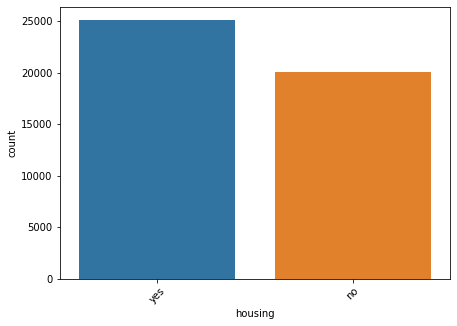



Column: loan
no     37967
yes     7244
Name: loan, dtype: int64


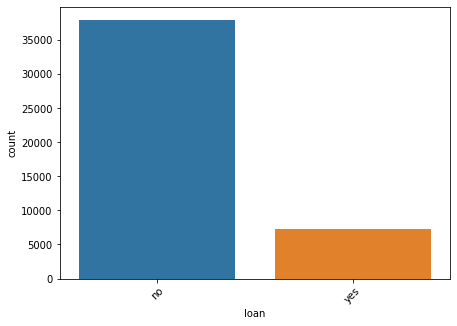



Column: contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64


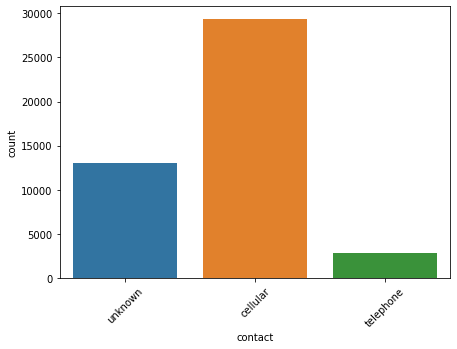



Column: month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


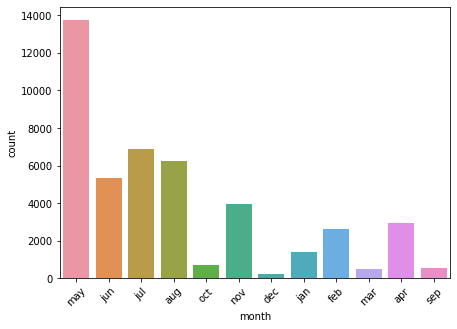



Column: poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64


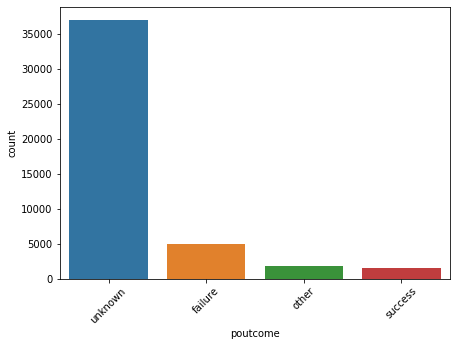



Column: y
no     39922
yes     5289
Name: y, dtype: int64


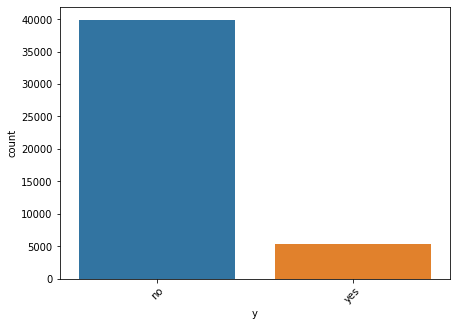

In [10]:
#Exploratory Data Analysis
for i in categorical.columns:
    print ( "Column:" , i )
    print ( data [ i ].value_counts ( ) )
    f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
    sns.countplot ( data [ i ] )
    plt.xticks ( rotation = 45 )
    plt.show ( )
    print ( "\n" )

Univariate Analysis for Numerical columns using Distribution plot and checking the skewness

Column: age
Skewness for age is 0.685


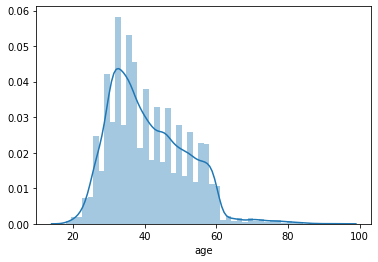

Column: balance
Skewness for balance is 8.36


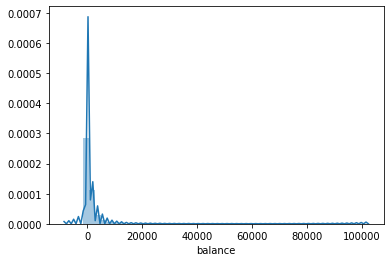

Column: day
Skewness for day is 0.093


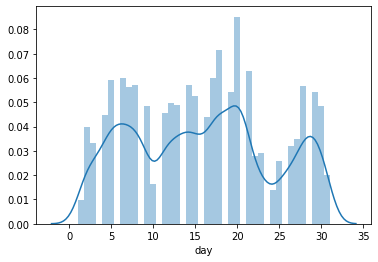

Column: duration
Skewness for duration is 3.144


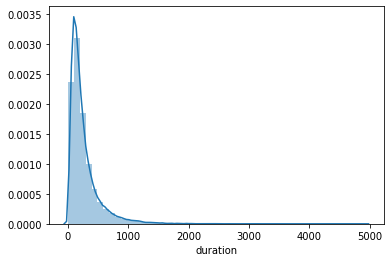

Column: campaign
Skewness for campaign is 4.899


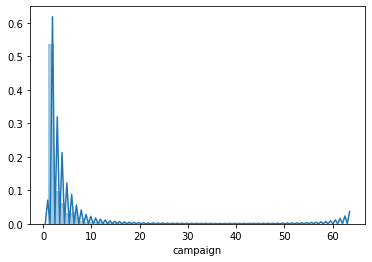

Column: pdays
Skewness for pdays is 2.616


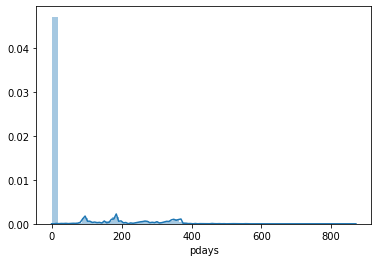

Column: previous
Skewness for previous is 41.846


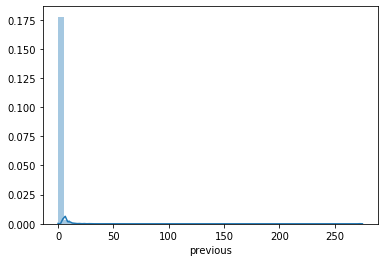

In [11]:
#Univariate Analysis for Numerical columns using Distribution plot and checking the skewness
for i in numerical.columns:
    print ( "Column:" , i )
    print ( "Skewness for {} is {}".format ( i , round ( data [ i ].skew ( ) , 3 ) ) )
    sns.distplot ( data [ i ] )
    plt.show ( )

Bivariate Analysis for Categorical and Numerical columns using Boxen plot, Box plot and Violin plot

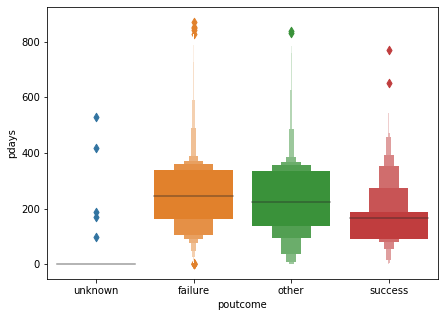

In [12]:
#Bivariate Analysis for Categorical and Numerical columns using Boxen plot, Box plot and Violin plot
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxenplot ( data [ "poutcome" ] , data [ "pdays" ] )
plt.show ( )

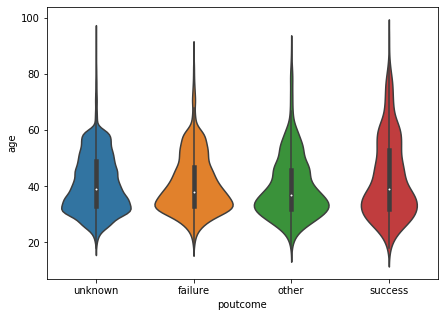

In [13]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.violinplot ( data [ "poutcome" ] , data [ "age" ] )
plt.show ( )

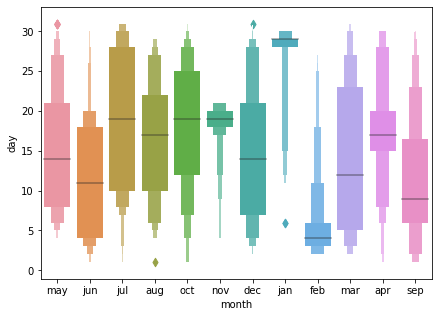

In [14]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxenplot ( data [ "month" ] , data [ "day" ] )
plt.show ( )

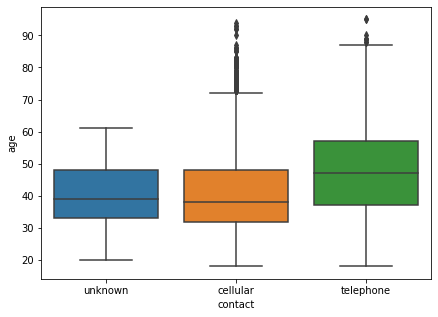

In [15]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxplot ( data [ "contact" ] , data [ "age" ] )
plt.show ( )

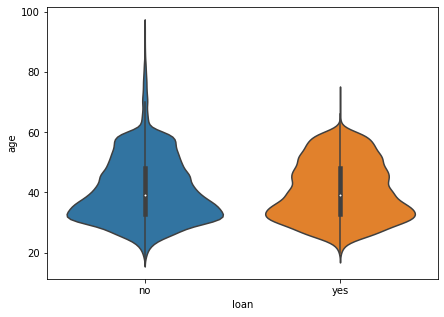

In [16]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.violinplot ( data [ "loan" ] , data [ "age" ] )
plt.show ( )

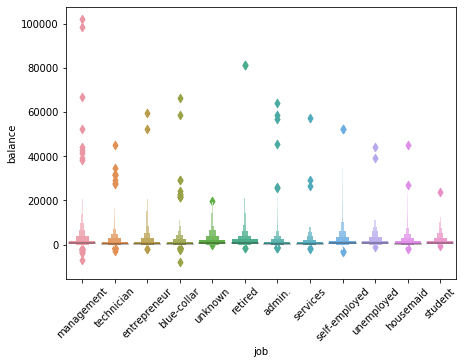

In [17]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxenplot ( data [ "job" ] , data [ "balance" ] )
plt.xticks ( rotation = 45 )
plt.show ( )

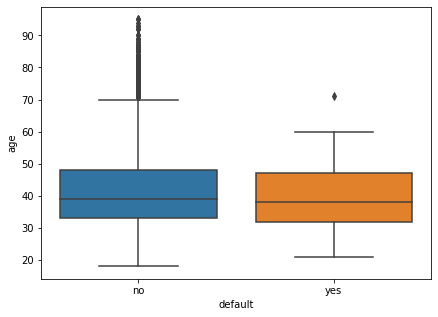

In [18]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxplot ( data [ "default" ] , data [ "age" ] )
plt.show ( )

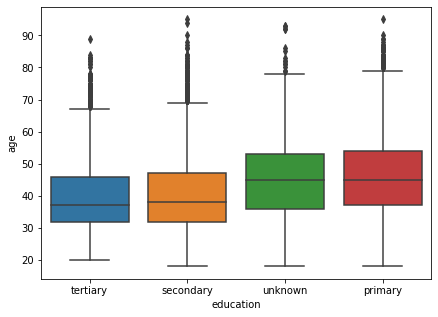

In [19]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxplot ( data [ "education" ] , data [ "age" ] )
plt.show ( )

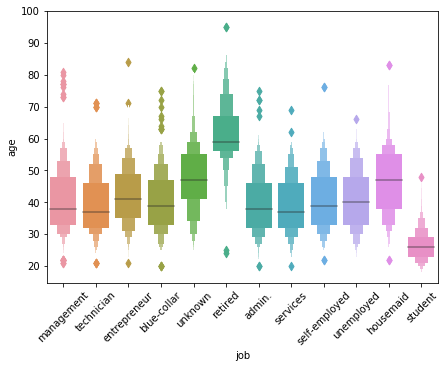

In [20]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.boxenplot ( data [ "job" ] , data [ "age" ] )
plt.xticks ( rotation = 45 )
plt.show ( )

Bivariate Analysis for Numerical and Numerical columns using scatterplot and using Categorical columns as hue for a better understanding

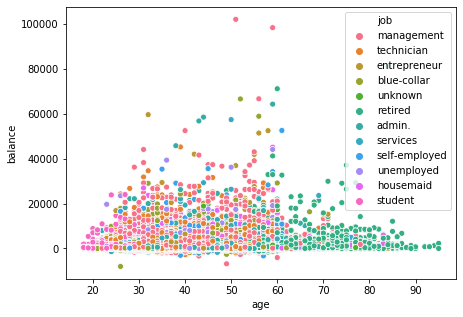

In [22]:
#Bivariate Analysis for Numerical and Numerical columns using scatterplot and using Categorical columns as hue for a better understanding
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.scatterplot ( data [ "age" ] , data [ "balance" ] , hue = data [ "job" ] )
plt.show ( )

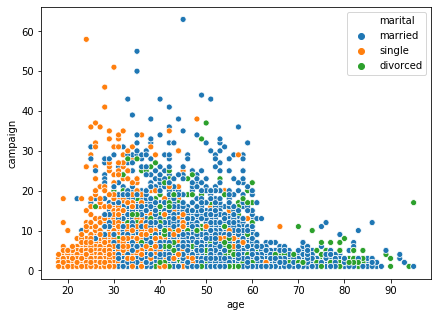

In [23]:
f , ax = plt.subplots ( figsize = ( 7 , 5 ) )
sns.scatterplot ( data [ "age" ] , data [ "campaign" ] , hue = data [ "marital" ] )
plt.show ( )

Statistical Modeling
Test of relationship using Chi-square test to check the associations between categorical variables

In [24]:
cat1 , cat2 = [ ] , [ ]
for i in categorical.columns:
    if data [ i ].nunique ( ) == 2:
        cat1.append ( i )
    else:
        cat2.append ( i )

In [25]:
for i in cat2:
    for j in cat1:
        print ( "Chi-square test for {} and {}".format ( i , j ) )
        print ( "Hypothesis testing for association between {} and {}".format ( i , j ) )
        print ( "Ha : There is an association between {} and {}".format ( i , j ) )
        print ( "Ha : There is no association between {} and {}".format ( i , j ) )
        pvalue = round ( stats.chi2_contingency ( pd.crosstab ( data [ i ] , data [ j ] ) ) [ 1 ] , 5 )
        print ( "p-value is" , pvalue ) 
        if pvalue < 0.05:
            print ( "We reject Ho since p-value of {} is less than alpha of 0.05.".format ( pvalue ) )
            print ( "Hence, we conclude by accepting alternate hypothesis." )
            print ( "Ha : There is an association between {} and {}".format ( i , j ) )
        else:
            print ( "We fail to reject Ho since p-value of {} is greater than alpha of 0.05.".format ( pvalue ) )
            print ( "Hence, we conclude by accepting null hypothesis." )
            print ( "Ho : There is no association between {} and {}".format ( i , j ) )
        print ( "\n" )

Chi-square test for job and default
Hypothesis testing for association between job and default
Ha : There is an association between job and default
Ha : There is no association between job and default
p-value is 0.0
We reject Ho since p-value of 0.0 is less than alpha of 0.05.
Hence, we conclude by accepting alternate hypothesis.
Ha : There is an association between job and default


Chi-square test for job and housing
Hypothesis testing for association between job and housing
Ha : There is an association between job and housing
Ha : There is no association between job and housing
p-value is 0.0
We reject Ho since p-value of 0.0 is less than alpha of 0.05.
Hence, we conclude by accepting alternate hypothesis.
Ha : There is an association between job and housing


Chi-square test for job and loan
Hypothesis testing for association between job and loan
Ha : There is an association between job and loan
Ha : There is no association between job and loan
p-value is 0.0
We reject Ho since p-v

p-value is 0.0
We reject Ho since p-value of 0.0 is less than alpha of 0.05.
Hence, we conclude by accepting alternate hypothesis.
Ha : There is an association between poutcome and loan


Chi-square test for poutcome and y
Hypothesis testing for association between poutcome and y
Ha : There is an association between poutcome and y
Ha : There is no association between poutcome and y
p-value is 0.0
We reject Ho since p-value of 0.0 is less than alpha of 0.05.
Hence, we conclude by accepting alternate hypothesis.
Ha : There is an association between poutcome and y




Test of Proportions using Z-Proportions test

In [26]:
for i in range ( len ( cat1 ) ):
    for j in range ( i , len ( cat1 ) ):
        if i != j:
            print ( "Z-proportions test for {} and {}".format ( cat1 [ i ] , cat1 [ j ] ) )
            print ( "Hypothesis testing for proportions between {} and {}".format ( cat1 [ i ] , cat1 [ j ] ) )
            print ( "Ha : The proportion of people opting for Yes in {j} and not {i} is not equal to thehe proportion of people opting for Yes in {j} and {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            print ( "Ho : The proportion of people opting for Yes in {j} and not {i} is equal to the proportion of people opting for Yes in {j} and {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            c =  pd.crosstab ( data [ cat1 [ i ] ]  , data [ cat1 [ j ] ] )
            print ( c )
            pvalue = round ( proportions_ztest ( [ c [ "yes" ] [ 0 ] , c [ "yes" ] [ 1 ] ] , 
                                      [ c [ "yes" ] [ 0 ] + c [ "no" ] [ 0 ] , 
                                      c [ "yes" ] [ 1 ] + c [ "no" ] [ 1 ] ] ) [ 1 ] , 5 )
            print (  "p-value is" , pvalue )
            if pvalue < 0.05:
                print ( "We reject Ho since p-value of {} is less than alpha of 0.05.".format ( pvalue ) )
                print ( "Hence, we conclude by accepting alternate hypothesis." )
                print ( "The proportion of people opting for Yes in {j} and not {i} is not equal to the proportion of people opting for Yes in {j} and {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            else:
                print ( "We fail to reject Ho since p-value of {} is greater than alpha of 0.05.".format ( pvalue ) )
                print ( "Hence, we conclude by accepting null hypothesis." )
                print ( "The proportion of people opting for Yes in {j} and not {i} is equal to the proportion of people opting for Yes in {j} and {i}".format ( i = cat1 [ i ] , j = cat1 [ j ] ) )
            print ( "\n" )

Z-proportions test for default and housing
Hypothesis testing for proportions between default and housing
Ha : The proportion of people opting for Yes in housing and not default is not equal to thehe proportion of people opting for Yes in housing and default
Ho : The proportion of people opting for Yes in housing and not default is equal to the proportion of people opting for Yes in housing and default
housing     no    yes
default              
no       19701  24695
yes        380    435
p-value is 0.20015
We fail to reject Ho since p-value of 0.20015 is greater than alpha of 0.05.
Hence, we conclude by accepting null hypothesis.
The proportion of people opting for Yes in housing and not default is equal to the proportion of people opting for Yes in housing and default


Z-proportions test for default and loan
Hypothesis testing for proportions between default and loan
Ha : The proportion of people opting for Yes in loan and not default is not equal to thehe proportion of people optin

Testing for skewness and best transformations

In [27]:
#Testing for skewness and best transformations
log , sqrt = [ ] , [ ]
for i in numerical.columns:
    print ( "Checking skewness for" , i )
    a = round ( data [ i ].skew ( ) , 3 )
    print ( "1. Normal Distribution" , a )
    d = pd.DataFrame ( )
    d [ "log" ] = np.log ( data [ i ] )
    b = round ( d [ "log" ].skew ( ) , 3 )
    print ( "2. Log Transformation" , b )
    d [ "Sqrt" ] = np.sqrt ( data [ i ] )
    c = round ( d [ "Sqrt" ].skew ( ) , 3 )
    print ( "3. Sqrt Transformation" , c )
    print ( "The best transformation would be:" )
    if np.abs ( a ) < np.abs ( b ) and np.abs ( a ) < np.abs ( c ):
        print ( "Normal" , a )
    elif np.abs ( b ) < np.abs ( a ) and np.abs ( b ) < np.abs ( c ):
        print ( "Log Transformation" , b )
        log.append ( i )
    else:
        print ( "Sqrt Transformation" , c )
        sqrt.append ( i )
    print ( "\n" )
print ( "Features to undergo Log transformation" , log )
print ( "Features to undergo Sqrt transformation" , sqrt )

Checking skewness for age
1. Normal Distribution 0.685
2. Log Transformation 0.099
3. Sqrt Transformation 0.382
The best transformation would be:
Log Transformation 0.099


Checking skewness for balance
1. Normal Distribution 8.36
2. Log Transformation nan
3. Sqrt Transformation 1.901
The best transformation would be:
Sqrt Transformation 1.901


Checking skewness for day
1. Normal Distribution 0.093
2. Log Transformation -1.074
3. Sqrt Transformation -0.388
The best transformation would be:
Normal 0.093


Checking skewness for duration
1. Normal Distribution 3.144
2. Log Transformation nan
3. Sqrt Transformation 1.174
The best transformation would be:
Sqrt Transformation 1.174


Checking skewness for campaign
1. Normal Distribution 4.899
2. Log Transformation 0.88
3. Sqrt Transformation 2.207
The best transformation would be:
Log Transformation 0.88


Checking skewness for pdays
1. Normal Distribution 2.616
2. Log Transformation -2.606
3. Sqrt Transformation -0.293
The best transformat

Checking the correlations between numerical variables

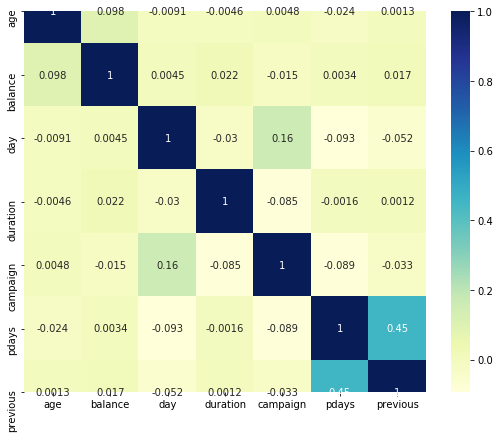

In [28]:
#Checking the correlations between numerical variables
f , ax = plt.subplots ( figsize = ( 9 , 7 ) )
sns.heatmap ( numerical.corr ( ) , cmap = "YlGnBu" , annot = True )
plt.show ( )

Checking VIF to drop individual predictors based on the inflation value

In [29]:
#Checking VIF to drop individual predictors based on the inflation value
vif = [ variance_inflation_factor ( numerical.values , i ) for i in range ( numerical.shape [ 1 ] ) ]
vif = pd.DataFrame ( { "VIF" : vif } , index = numerical.columns )
vif

,VIF
age,5.004058
balance,1.212908
day,3.984268
duration,1.901309
campaign,1.824694
pdays,1.454202
previous,1.341641


In [30]:
#I won't be transforming balance and pdays because it would end up creating null values
sqrt.remove ( "balance" )
sqrt.remove ( "pdays" )
for i in log:
    data [ i ] = np.log ( data [ i ] )
for i in sqrt:
    data [ i ] = np.sqrt ( data [ i ] )

In [31]:
#Using Label Encoder for Categorical variables
for i in categorical.columns:
    le = LabelEncoder ( )
    data [ i ] = le.fit_transform ( data [ i ] )

In [32]:
#Splitting the data into X and y
X = data.drop ( "y" , axis = 1 )
y = data [ "y" ]

In [33]:
#Logit Model for the data
xc = sm.add_constant( X )
model = sm.Logit ( y , xc ).fit ( )
model.summary ( )

Optimization terminated successfully.
         Current function value: 0.253308
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                45211
Model:                          Logit   Df Residuals:                    45194
Method:                           MLE   Df Model:                           16
Date:                Sat, 22 Feb 2020   Pseudo R-squ.:                  0.2981
Time:                        15:05:01   Log-Likelihood:                -11452.
converged:                       True   LL-Null:                       -16315.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.6335      0.325    -20.405      0.000      -7.271      -5.996
age            0.0442      0.074      0.599      0.549      -0.100       0.189
job            0.0076      0.005      1.379      0.168      -0.003       0.018
marital        0.1572      0.032      4.919      0.000       0.095       0.220
education      0.1924      0.024      8.130      0.000       0.146       0.239
default       -0.3561      0.162     -2.198      0.028      -0.674      -0.039
balance     1.868e-05   4.72e-06      3.957      0.000    9.43e-06    2.79e-05
housing       -1.0359      0.038    -27.027      0.000      -1.111      -0.961
loan          -0.6889      0.057    -11.994      0.000      -0.801      -0.576
contact       -0.5957      0.027    -22.144      0.000      -0.648      -0.543
day           -0.0038      0.002     -1.797      0.072      -0.008       0.000
month          0.0308      0.006      5.386      0.000       0.020       0.042
duration       0.1810      0.003     69.473      0.000       0.176       0.186
campaign      -0.4455      0.029    -15.306      0.000      -0.503      -0.388
pdays          0.0026      0.000      9.771      0.000       0.002       0.003
previous       0.8261      0.034     24.134      0.000       0.759       0.893
poutcome       0.5457      0.034     16.006      0.000       0.479       0.613
==============================================================================
"""

In [35]:
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 37 )

In [36]:
smote = SMOTE ( )
X_train_sm , y_train_sm = smote.fit_sample ( X_train , y_train.ravel ( ) )

Logistic Regression

In [37]:
#Logistic Regression
lr = LogisticRegression ( )
lr.fit ( X_train , y_train )
lr_pred_train = lr.predict ( X_train )
lr_pred_test = lr.predict ( X_test )
cm = confusion_matrix ( y_test , lr_pred_test )
model.append ( "Logistic Regression" )
train.append ( round ( accuracy_score ( y_train , lr_pred_train ) , 3 ) )
test.append ( round ( accuracy_score ( y_test , lr_pred_test ) , 3 ) )
type1.append ( cm [ 0 , 1 ] )
type2.append ( cm [ 1 , 0 ] )
correct.append ( cm [ 0 , 0 ] + cm [ 1 , 1 ] )
errors.append ( cm [ 1 , 0 ] + cm [ 0 , 1 ] )
sens.append ( round ( cm [ 1 , 1 ] / ( cm [ 1 , 1 ] + cm [ 1 , 0 ] ) , 3 ) )
spec.append ( round ( cm [ 0 , 0 ] / ( cm [ 0 , 0 ] + cm [ 0 , 1 ] ) , 3 ) )
ROC.append ( round ( roc_auc_score ( y_test , lr.predict_proba ( X_test ) [ : , 1 ] ) , 3 ) )
print ( "Train score:" , round ( accuracy_score ( y_train , lr_pred_train ) , 3 ) )
print ( "Test score:" , round ( accuracy_score ( y_test , lr_pred_test ) , 3 ) )
print ( "Test Classification Report:\n" , classification_report ( y_test , lr_pred_test ) )
print ( "Test Confusion Matrix:\n" , cm )

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Adinath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-b3ccec902602>", line 7, in <module>
    model.append ( "Logistic Regression" )
  File "C:\Users\Adinath\Anaconda3\lib\site-packages\statsmodels\base\wrapper.py", line 35, in __getattribute__
    obj = getattr(results, attr)
AttributeError: 'LogitResults' object has no attribute 'append'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Adinath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Adinath\Anaconda3\lib\site-p

AttributeError: 'LogitResults' object has no attribute 'append'

In [39]:
Train score: 0.893
Test score: 0.891
Test Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     12005
           1       0.55      0.26      0.35      1559

    accuracy                           0.89     13564
   macro avg       0.73      0.61      0.65     13564
weighted avg       0.87      0.89      0.87     13564

Test Confusion Matrix:
 [[11685   320]
 [ 1160   399]]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)